In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom/mushroom_cleaned.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/mushroom/mushroom_cleaned.csv")

In [4]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [6]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

In [7]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [8]:
df.min()

cap-diameter       0.000000
cap-shape          0.000000
gill-attachment    0.000000
gill-color         0.000000
stem-height        0.000426
stem-width         0.000000
stem-color         0.000000
season             0.027372
class              0.000000
dtype: float64

In [9]:
df.max()

cap-diameter       1891.000000
cap-shape             6.000000
gill-attachment       6.000000
gill-color           11.000000
stem-height           3.835320
stem-width         3569.000000
stem-color           12.000000
season                1.804273
class                 1.000000
dtype: float64

In [10]:
df["class"].unique()

array([1, 0])

# Binary Logistic Regression

In [11]:
y = df["class"]
x = df.drop("class", axis=1)

In [12]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: class, Length: 54035, dtype: int64

In [13]:
x

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
x_train

array([[-0.90319838,  0.92730337, -0.95948901, ..., -1.04000676,
        -0.74211062, -0.20633721],
       [ 0.09241927,  0.4648552 , -0.51076625, ..., -0.44502927,
         0.79082058, -0.02654537],
       [ 0.88558543, -0.92248933, -0.95948901, ...,  0.57000744,
         0.79082058, -0.02654537],
       ...,
       [-1.33028785, -1.84738568, -0.95948901, ..., -1.237907  ,
        -0.74211062, -0.20633721],
       [ 1.96440233, -0.92248933, -0.95948901, ...,  0.87132651,
         0.79082058, -0.02654537],
       [ 0.54724182, -0.92248933,  1.2841248 , ...,  0.21634056,
        -0.43552438, -0.02654537]])

In [20]:
x_test

array([[ 0.72932756, -0.93948987, -0.96747019, ...,  1.78542363,
        -0.73792027,  2.7378303 ],
       [ 0.0151675 ,  0.91868491, -0.07050709, ..., -0.36559313,
        -1.35079334, -0.04036607],
       [ 1.55831337, -0.93948987, -0.96747019, ...,  1.15375543,
         0.7942624 , -0.04036607],
       ...,
       [ 2.02041694,  0.91868491,  1.27493755, ...,  0.85657548,
        -0.73792027, -0.21699385],
       [-0.84462521,  0.91868491, -0.96747019, ..., -0.60616737,
        -2.27010294,  2.7378303 ],
       [-0.4189298 ,  0.91868491,  1.7234191 , ..., -0.61131334,
         0.7942624 , -0.21699385]])

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logReg = LogisticRegression()

In [23]:
logReg.fit(x_train, y_train)

LogisticRegression()

In [24]:
## Checking results on training data
trainPrediction = logReg.predict(x_train)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print("Training Data Results")
print(classification_report(trainPrediction, y_train))

Training Data Results
              precision    recall  f1-score   support

           0       0.54      0.61      0.57     17264
           1       0.71      0.65      0.68     25964

    accuracy                           0.63     43228
   macro avg       0.63      0.63      0.63     43228
weighted avg       0.64      0.63      0.64     43228



In [27]:
## Checking results on testing/unseen data
testPrediction = logReg.predict(x_test)

In [28]:
print("Testing Data Results")
print(classification_report(testPrediction, y_test))

Testing Data Results
              precision    recall  f1-score   support

           0       0.54      0.61      0.57      4297
           1       0.72      0.65      0.68      6510

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.65      0.64      0.64     10807



# Multinomial Logistic Regression

In [29]:
from sklearn.datasets import load_iris

In [30]:
data = load_iris(as_frame = True) 

In [31]:
data.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [33]:
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df = data.frame

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [36]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [37]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [38]:
df["target"].unique()

array([0, 1, 2])

In [39]:
y = df["target"]

In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [41]:
x = df.drop("target", axis =1)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [43]:
mlogReg = LogisticRegression(max_iter=300, multi_class="multinomial")

In [44]:
mlogReg.fit(x_train,y_train)

LogisticRegression(max_iter=300, multi_class='multinomial')

In [45]:
train_predict = mlogReg.predict(x_train)

In [46]:
print("Training Data Results")
print(classification_report(train_predict, y_train))

Training Data Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.93      1.00      0.96        41
           2       1.00      0.94      0.97        50

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



In [47]:
test_predict = mlogReg.predict(x_test)

In [48]:
print("Testing Data Results")
print(classification_report(test_predict, y_test))

Testing Data Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# image classification

In [49]:
from sklearn.datasets import fetch_openml

In [50]:
data = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [51]:
data.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
data.data.shape 

(70000, 784)

In [53]:
pixel = data.data

In [54]:
pixel.min()

0.0

In [55]:
pixel.max()

255.0

In [56]:
pixel = pixel/255

In [57]:
pixel.min()

0.0

In [58]:
pixel.max()

1.0

In [59]:
data.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [60]:
x = pixel

In [61]:
x.max()


1.0

In [62]:
y = data.target

In [63]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [64]:
import numpy as np

In [65]:
y = y.astype(np.int32)

In [66]:
y.dtype

dtype('int32')

In [67]:
from matplotlib import pyplot as plt

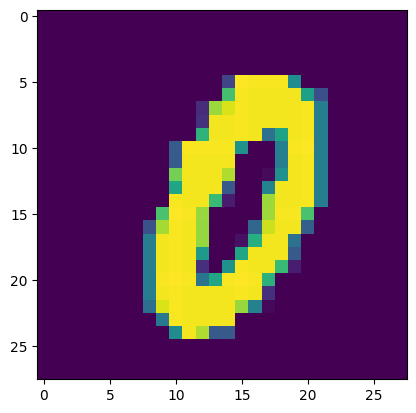

In [68]:
plt.imshow(x[34].reshape(28,28))

In [69]:
digit = LogisticRegression(max_iter=500, multi_class="multinomial")

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [72]:
digit.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [73]:
train_model_predict = digit.predict(x_train)

In [79]:
train_model_predict[51]

3

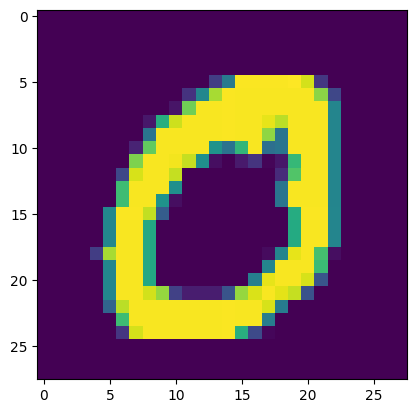

In [80]:
plt.imshow(x[51].reshape(28,28))

In [87]:
print(classification_report(train_model_predict, y_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6265
           1       0.98      0.97      0.97      7160
           2       0.92      0.94      0.93      6236
           3       0.92      0.92      0.92      6321
           4       0.95      0.94      0.95      6234
           5       0.90      0.91      0.91      5610
           6       0.97      0.96      0.96      6268
           7       0.94      0.95      0.95      6541
           8       0.90      0.91      0.91      6088
           9       0.92      0.91      0.92      6277

    accuracy                           0.94     63000
   macro avg       0.94      0.94      0.94     63000
weighted avg       0.94      0.94      0.94     63000



In [81]:
test_model_predict = digit.predict(x_test)

In [82]:
test_model_predict[51]

0

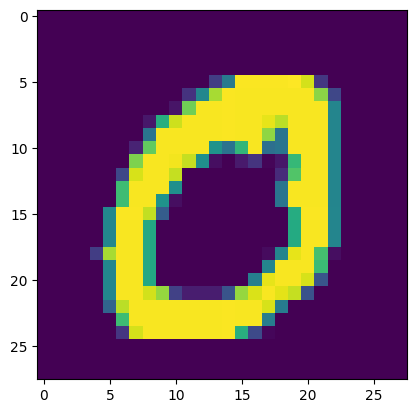

In [83]:
plt.imshow(x[51].reshape(28,28))

In [86]:
print(classification_report(test_model_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       680
           1       0.98      0.94      0.96       831
           2       0.89      0.91      0.90       658
           3       0.90      0.89      0.89       769
           4       0.93      0.92      0.92       620
           5       0.88      0.89      0.89       653
           6       0.95      0.94      0.94       683
           7       0.94      0.93      0.94       731
           8       0.86      0.91      0.89       660
           9       0.91      0.92      0.91       715

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000

